In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

получение данных из файлы и очистка строк, где есть хотя бы один пропущеный признак

In [2]:
df = pd.read_csv("Titanic.csv")
print(df)
new_df = df.dropna()

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Удаление столбцов, которые имеют не числовое значение, кроме 'Sex' и 'Embarked'

In [3]:
new_df = new_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
print(new_df)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
1           1       1  female  38.0      1      0  71.2833        C
3           1       1  female  35.0      1      0  53.1000        S
6           0       1    male  54.0      0      0  51.8625        S
10          1       3  female   4.0      1      1  16.7000        S
11          1       1  female  58.0      0      0  26.5500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
871         1       1  female  47.0      1      1  52.5542        S
872         0       1    male  33.0      0      0   5.0000        S
879         1       1  female  56.0      0      1  83.1583        C
887         1       1  female  19.0      0      0  30.0000        S
889         1       1    male  26.0      0      0  30.0000        C

[183 rows x 8 columns]


Перекодирование данных в числовой вид в столбцах Sex и Embarked. Sex – 0 и 1, Embarked – 1,2,3

In [4]:
sex_values = new_df['Sex'].values
for i in range(len(sex_values)):
    sex_values[i] = 1 if sex_values[i] == 'male' else 0
#print(df['Sex'])

embarked_values = new_df['Embarked'].values
for i in range(len(embarked_values)):
    if embarked_values[i] == "C":
        embarked_values[i] = 1
    elif embarked_values[i] == "S":
        embarked_values[i] = 2
    else:
        embarked_values[i] = 3

#print(df['Embarked'].values)
print(new_df)

     Survived  Pclass Sex   Age  SibSp  Parch     Fare Embarked
1           1       1   0  38.0      1      0  71.2833        1
3           1       1   0  35.0      1      0  53.1000        2
6           0       1   1  54.0      0      0  51.8625        2
10          1       3   0   4.0      1      1  16.7000        2
11          1       1   0  58.0      0      0  26.5500        2
..        ...     ...  ..   ...    ...    ...      ...      ...
871         1       1   0  47.0      1      1  52.5542        2
872         0       1   1  33.0      0      0   5.0000        2
879         1       1   0  56.0      0      1  83.1583        1
887         1       1   0  19.0      0      0  30.0000        2
889         1       1   1  26.0      0      0  30.0000        1

[183 rows x 8 columns]


получение процента потерянных данных

In [5]:
df_size = df.shape[0]*df.shape[1]
new_df_size = new_df.shape[0]*new_df.shape[1]
loss = (df_size - new_df_size)/df_size * 100
print(f'процент потерянных данных {round(loss,2)}%')

процент потерянных данных 86.31%


обучение модели

In [7]:
X = new_df.drop(columns=['Survived'])
y = new_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
accuracy_no_embarked = clf.score(X_test, y_test)
print(f"Точность без Embarked: {round(accuracy_no_embarked, 6)}")

Точность без Embarked: 0.818182


Влияние признака Embarked низкое

In [9]:
%pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ------------- -------------------------- 102.4/294.9 kB 1.2 MB/s eta 0:00:01
   ------------- -------------------------- 102.4/294.9 kB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 1.4 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

вспомогательная функция для получения метрик и для отрисовки

In [11]:
def get_metrics_and_draw(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_probs = clf.predict_proba(X_test)
    print("accurracy:", accuracy_score(y_test, y_pred))
    print("metric precision: ", precision_score(y_test, y_pred))
    print("metric recall: ", recall_score(y_test, y_pred))
    print("metric f1: ", f1_score(y_test, y_pred))
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), ax=axs[0])
    axs[0].set_title("Тепловая карта матрицы ошибок")
    precision, recall, _ = precision_recall_curve(y_test, y_pred_probs[:,1])
    axs[1].plot(precision, recall)
    axs[1].set_xlabel("Precision")
    axs[1].set_ylabel("Recall")
    axs[1].set_title("Precision-recall")
    TPR, FPR, _ = roc_curve(y_test, y_pred_probs[:,1])
    axs[2].plot(TPR, FPR)
    axs[2].set_xlabel("TPR")
    axs[2].set_ylabel("FPR")
    axs[2].set_title("ROC")

логистическая регрессия
accurracy: 0.8181818181818182
metric precision:  0.8636363636363636
metric recall:  0.9047619047619048
metric f1:  0.8837209302325582


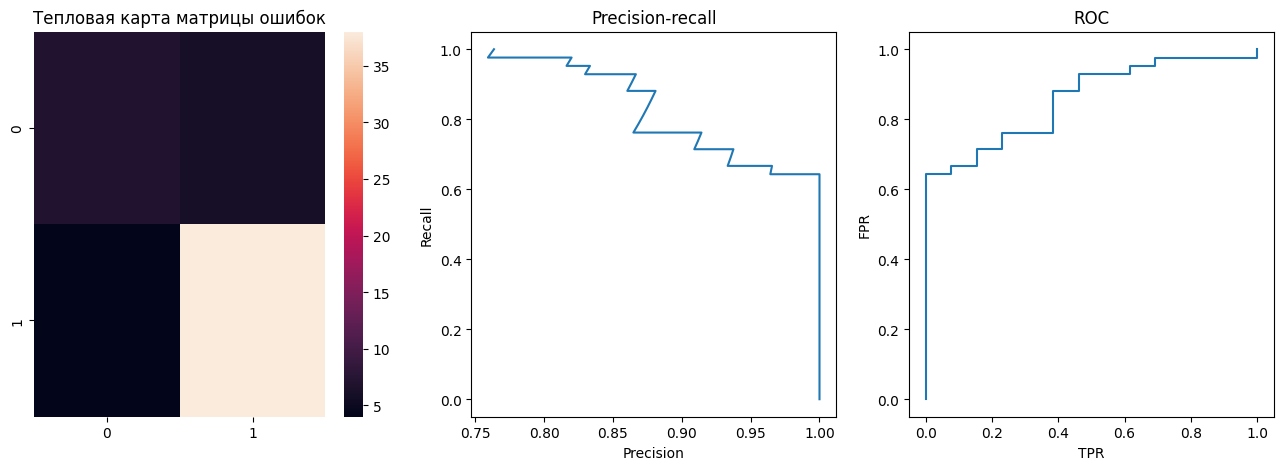

In [13]:
print('логистическая регрессия')
get_metrics_and_draw(LogisticRegression(max_iter=1000))

метод опорных векторов
accurracy: 0.7272727272727273
metric precision:  0.9090909090909091
metric recall:  0.7142857142857143
metric f1:  0.8


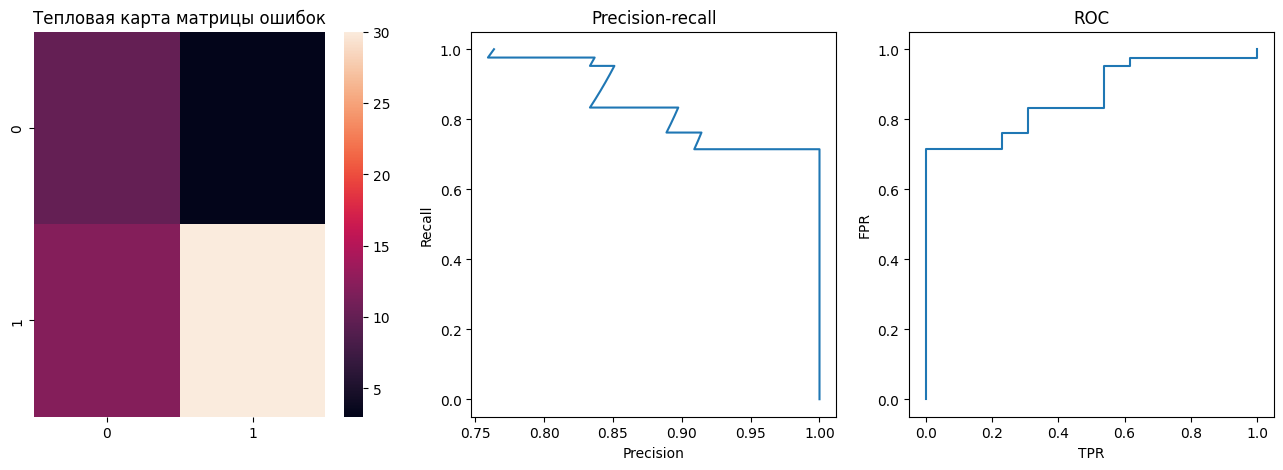

In [14]:
from sklearn.svm import SVC
print('метод опорных векторов')
get_metrics_and_draw(SVC(kernel='linear', probability=True))

Метод ближайших соседей
accurracy: 0.7454545454545455
metric precision:  0.7916666666666666
metric recall:  0.9047619047619048
metric f1:  0.8444444444444444


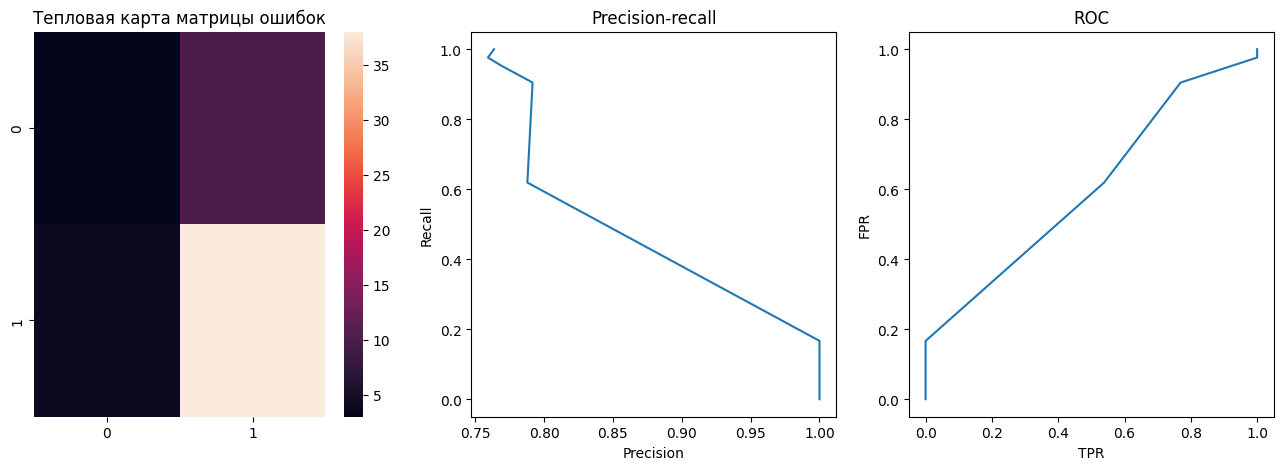

In [15]:
from sklearn.neighbors import KNeighborsClassifier
print('Метод ближайших соседей')
get_metrics_and_draw(KNeighborsClassifier())

сравнивая три модели, можно сделать вывод, что: 1.Логистическая регрессия - Довольно хорошие и сбалансированное показатели по всем метрикам. 2.Метод опорных векторов - precision довольно высокий, значит когда модель говорит "положительный класс", она почти всегда права. в то же время recall ниже, чем precision, значит модель теряет объекты положительного класса. 3.В последней же можели все наоборот recall довольно высокий, а значит модель ловит почти все объекты положительного класса. Precision ниже, из этого следует, что среди положительных предсказаний часто есть ошибки. Модель ловит почти всё, но делает больше ложных срабатываний. Таким образом, самой лучшей моделью является логистическая регрессия.